<a href="https://colab.research.google.com/github/randreove/Stock_Market_Prediciton/blob/main/Model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a hacer una ejecución para una empresa de cada industria, para ver cuál es el comportamiento general para cada industria de cada modelo:

- Bienes de consumo: ITX
- Infraestructura: ACS
- Petróleo y energía: REP
- Servicios de consumo: IAG
- Servicios financieros: SAN
- Servicios inmobiliarios: COL
- Tecnología y telecomunicaciones: TEF




In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, GRU
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
import tensorflow as tf
# import kerastuner as kt

In [ ]:
# df = pd.read_csv('/content/COL_with_indicators.csv')


# Bienes de consumo
# df = pd.read_csv('/content/GRF_preprocessed.csv')
df = pd.read_csv('/content/ITX_preprocessed.csv')
# df = pd.read_csv('/content/ROVI_preprocessed.csv')

# Infraestructura
# df = pd.read_csv('/content/FER_preprocessed.csv')
# df = pd.read_csv('/content/ANA_preprocessed.csv')
# df = pd.read_csv('/content/SCYR_preprocessed.csv')
# df = pd.read_csv('/content/ACX_preprocessed.csv')
# df = pd.read_csv('/content/ACS_preprocessed.csv')
# df = pd.read_csv('/content/FDR_preprocessed.csv')
# df = pd.read_csv('/content/MTS_preprocessed.csv')

# Petróleo y energía
# df = pd.read_csv('/content/IBE_preprocessed.csv')
# df = pd.read_csv('/content/REP_preprocessed.csv')
# df = pd.read_csv('/content/ENG_preprocessed.csv')
# df = pd.read_csv('/content/ELE_preprocessed.csv')
# df = pd.read_csv('/content/SLR_preprocessed.csv')
# df = pd.read_csv('/content/NTGY_preprocessed.csv')
# df = pd.read_csv('/content/RED_preprocessed.csv')
# df = pd.read_csv('/content/ANE_preprocessed.csv')


# Servicios de consumo
# df = pd.read_csv('/content/IAG_preprocessed.csv')
# df = pd.read_csv('/content/AENA_preprocessed.csv')
# df = pd.read_csv('/content/LOG_preprocessed.csv')
# df = pd.read_csv('/content/MEL_preprocessed.csv')

# Servicios financieros
# df = pd.read_csv('/content/SAN_preprocessed.csv')
# df = pd.read_csv('/content/BBVA_preprocessed.csv')
# df = pd.read_csv('/content/CABK_preprocessed.csv')
# df = pd.read_csv('/content/SAB_preprocessed.csv')
# df = pd.read_csv('/content/BKT_preprocessed.csv')
# df = pd.read_csv('/content/MAP_preprocessed.csv')
# df = pd.read_csv('/content/UNI_preprocessed.csv')

# Servicios inmobiliarios
# df = pd.read_csv('/content/COL_preprocessed.csv') # Resultados muy malos porque hay un bajón increible después de la crisis de 2008
# df = pd.read_csv('/content/MRL_preprocessed.csv')

# Tecnología y telecomunicaciones
# df = pd.read_csv('/content/TEF_preprocessed.csv') # Muy mala también
# df = pd.read_csv('/content/CLNX_preprocessed.csv')
# df = pd.read_csv('/content/AMS_preprocessed.csv')
# df = pd.read_csv('/content/IDR_preprocessed.csv')

In [ ]:
empresa = 'ITX'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3624 non-null   object 
 1   Open           3624 non-null   float64
 2   High           3624 non-null   float64
 3   Low            3624 non-null   float64
 4   Close          3624 non-null   float64
 5   Adj Close      3624 non-null   float64
 6   Volume         3624 non-null   int64  
 7   SMA            3611 non-null   float64
 8   EMA            3611 non-null   float64
 9   RSI            3610 non-null   float64
 10  MACD           3591 non-null   float64
 11  MACDsignal     3591 non-null   float64
 12  MACDhist       3591 non-null   float64
 13  BBANDS_upper   3620 non-null   float64
 14  BBANDS_middle  3620 non-null   float64
 15  BBANDS_lower   3620 non-null   float64
 16  STOCH_k        3616 non-null   float64
 17  STOCH_d        3616 non-null   float64
 18  ADX     

In [ ]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
SMA              13
EMA              13
RSI              14
MACD             33
MACDsignal       33
MACDhist         33
BBANDS_upper      4
BBANDS_middle     4
BBANDS_lower      4
STOCH_k           8
STOCH_d           8
ADX              27
dtype: int64

In [ ]:
df = df[df['Volume'] != 0].dropna()

In [ ]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
SMA              0
EMA              0
RSI              0
MACD             0
MACDsignal       0
MACDhist         0
BBANDS_upper     0
BBANDS_middle    0
BBANDS_lower     0
STOCH_k          0
STOCH_d          0
ADX              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3591 entries, 33 to 3623
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3591 non-null   object 
 1   Open           3591 non-null   float64
 2   High           3591 non-null   float64
 3   Low            3591 non-null   float64
 4   Close          3591 non-null   float64
 5   Adj Close      3591 non-null   float64
 6   Volume         3591 non-null   int64  
 7   SMA            3591 non-null   float64
 8   EMA            3591 non-null   float64
 9   RSI            3591 non-null   float64
 10  MACD           3591 non-null   float64
 11  MACDsignal     3591 non-null   float64
 12  MACDhist       3591 non-null   float64
 13  BBANDS_upper   3591 non-null   float64
 14  BBANDS_middle  3591 non-null   float64
 15  BBANDS_lower   3591 non-null   float64
 16  STOCH_k        3591 non-null   float64
 17  STOCH_d        3591 non-null   float64
 18  ADX         

In [ ]:
display(df.head(5))

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,MACDsignal,MACDhist,BBANDS_upper,BBANDS_middle,BBANDS_lower,STOCH_k,STOCH_d,ADX
33,2010-02-18,8.598,8.623,8.410,8.486,6.513084,11235650,8.662857,8.638306,42.518970,-0.081029,-0.052629,-0.028400,8.694555,8.5742,8.453845,57.424874,68.481015,26.236933
34,2010-02-19,8.444,8.732,8.379,8.732,6.701891,15817480,8.626500,8.650799,50.910782,-0.067616,-0.055627,-0.011989,8.776818,8.6146,8.452382,63.589989,64.985052,25.344311
35,2010-02-22,8.732,8.778,8.504,8.515,6.535341,6766330,8.577714,8.632692,44.710023,-0.073647,-0.059231,-0.014416,8.781340,8.6002,8.419060,52.867174,57.960679,24.193432
36,2010-02-23,8.554,8.554,8.382,8.461,6.493897,6237565,8.549714,8.609800,43.296805,-0.081840,-0.063753,-0.018088,8.759962,8.5610,8.362039,51.545637,56.000933,23.784098
37,2010-02-24,8.517,8.662,8.390,8.597,6.598279,8395115,8.559929,8.608093,47.774137,-0.076478,-0.066298,-0.010180,8.754646,8.5582,8.361754,36.424528,46.945779,22.656143


In [ ]:
display(df.tail(5))

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,MACDsignal,MACDhist,BBANDS_upper,BBANDS_middle,BBANDS_lower,STOCH_k,STOCH_d,ADX
3619,2024-02-23,41.099998,41.320000,40.849998,41.009998,41.009998,1810161,39.633571,39.927103,68.947210,0.508814,0.334710,0.174104,41.619004,40.525999,39.432995,90.407105,94.038323,24.561321
3620,2024-02-26,41.080002,41.599998,40.990002,41.599998,41.599998,1462144,39.814285,40.150156,72.927176,0.596666,0.387101,0.209565,41.879090,40.912000,39.944909,91.994407,92.359407,26.309278
3621,2024-02-27,41.500000,41.549999,40.759998,41.040001,41.040001,1370414,39.995714,40.268802,64.479812,0.614025,0.432486,0.181539,41.628695,41.100000,40.571305,82.574317,88.325276,27.269760
3622,2024-02-28,40.919998,41.090000,40.389999,41.009998,41.009998,1438929,40.147857,40.367628,64.051737,0.618234,0.469635,0.148598,41.600781,41.139999,40.679218,70.873006,81.813910,27.189940
3623,2024-02-29,41.160000,41.540001,40.950001,41.009998,41.009998,3410040,40.287142,40.453277,64.051737,0.614486,0.498605,0.115881,41.600578,41.133999,40.667420,54.619546,69.355623,27.712280


## Defino conjunto de datos normal

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Volume', 'SMA','EMA','RSI', 'MACD','MACDsignal','MACDhist','BBANDS_upper','BBANDS_middle','BBANDS_lower',
              'STOCH_k','STOCH_d','ADX']


scaled_df = scaler.fit_transform(df[scale_cols])

X_normal = pd.DataFrame(scaled_df, columns=scale_cols)



print(X_normal)

          Open      High       Low    Volume       SMA       EMA       RSI  \
0     0.004659  0.002088  0.000951  0.053835  0.003565  0.001008  0.454292   
1     0.000000  0.005386  0.000000  0.076095  0.002419  0.001400  0.570653   
2     0.008712  0.006778  0.003833  0.032121  0.000882  0.000831  0.484673   
3     0.003328  0.000000  0.000092  0.029552  0.000000  0.000113  0.465078   
4     0.002208  0.003268  0.000337  0.040035  0.000322  0.000059  0.527160   
...        ...       ...       ...       ...       ...       ...       ...   
3586  0.987899  0.991527  0.995707  0.008042  0.979407  0.983478  0.820744   
3587  0.987294  1.000000  1.000000  0.006352  0.985101  0.990482  0.875930   
3588  1.000000  0.998487  0.992947  0.005906  0.990818  0.994207  0.758799   
3589  0.982454  0.984567  0.981601  0.006239  0.995611  0.997311  0.752864   
3590  0.989714  0.998184  0.998773  0.015815  1.000000  1.000000  0.752864   

          MACD  MACDsignal  MACDhist  BBANDS_upper  BBANDS_midd

In [ ]:
# Split x_pca into input sequences and target values
lookback = 30 #Using past 10 days'daily data of below columns'data to predict the 'Close' price

X_p = []
y_p = []
for i in range(len(X_normal) - lookback):
    X_p.append(X_normal[i:i+lookback])
    y_p.append(df['Close'].values[i+lookback])

# Convert to numpy arrays
X_p = np.array(X_p)
y_p = np.array(y_p)

In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
X_p = scaler.fit_transform(X_p.reshape(X_p.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_p = y_scaler.fit_transform(y_p.reshape(-1, 1))

In [ ]:
np.mean(X_p), np.std(X_p), np.mean(y_p), np.std(y_p)

# Si fuese StandarScaler saldría media 0 std 1

(0.505654179580229,
 0.2485150569565804,
 0.48665357496810707,
 0.21654793354930624)

In [ ]:
# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200) # Creo que podría probar hasta test_size = 500
for train_index, test_index in tscv.split(X_p, y_p):
    X_p_train, X_p_test = X_p[train_index], X_p[test_index]
    y_p_train, y_p_test = y_p[train_index], y_p[test_index]

In [ ]:
X_p_train = X_p_train.reshape((X_p_train.shape[0], lookback, -1))
X_p_test = X_p_test.reshape((X_p_test.shape[0], lookback, -1))

In [ ]:
print(X_p_train.shape, X_p_test.shape)
print(y_p_train.shape, y_p_test.shape)

(3361, 30, 16) (200, 30, 16)
(3361, 1) (200, 1)


## Defino conjunto de datos para PCA

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low','Volume','SMA','EMA','RSI', 'MACD','MACDsignal','MACDhist','BBANDS_upper','BBANDS_middle','BBANDS_lower',
              'STOCH_k','STOCH_d','ADX']

scaled_df_pca = scaler.fit_transform(df[scale_cols])

scaled_df_pca = pd.DataFrame(scaled_df_pca, columns=scale_cols)

print(scaled_df_pca)

          Open      High       Low    Volume       SMA       EMA       RSI  \
0     0.004659  0.002088  0.000951  0.053835  0.003565  0.001008  0.454292   
1     0.000000  0.005386  0.000000  0.076095  0.002419  0.001400  0.570653   
2     0.008712  0.006778  0.003833  0.032121  0.000882  0.000831  0.484673   
3     0.003328  0.000000  0.000092  0.029552  0.000000  0.000113  0.465078   
4     0.002208  0.003268  0.000337  0.040035  0.000322  0.000059  0.527160   
...        ...       ...       ...       ...       ...       ...       ...   
3586  0.987899  0.991527  0.995707  0.008042  0.979407  0.983478  0.820744   
3587  0.987294  1.000000  1.000000  0.006352  0.985101  0.990482  0.875930   
3588  1.000000  0.998487  0.992947  0.005906  0.990818  0.994207  0.758799   
3589  0.982454  0.984567  0.981601  0.006239  0.995611  0.997311  0.752864   
3590  0.989714  0.998184  0.998773  0.015815  1.000000  1.000000  0.752864   

          MACD  MACDsignal  MACDhist  BBANDS_upper  BBANDS_midd

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(scaled_df_pca)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

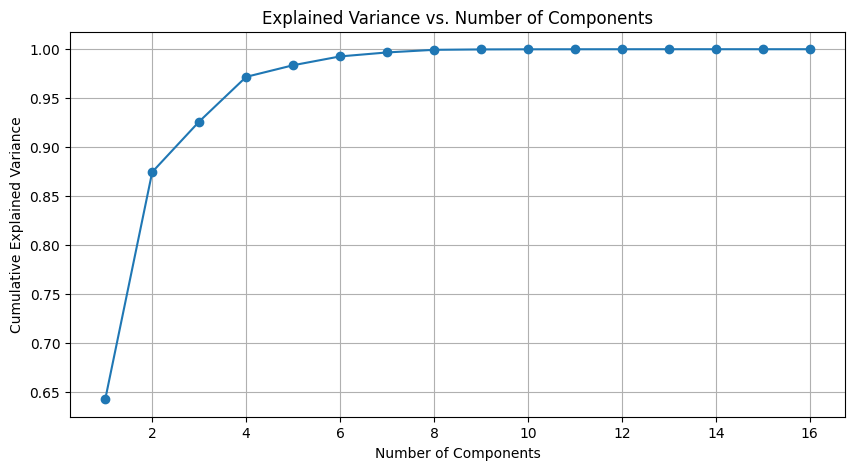

In [ ]:
# Plot the cumulative explained variance against the number of components
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Access the principal components
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_

# Print the explained variance of each principal component
variance_acumul = 0
for i, explained_variance in enumerate(explained_variances):
    variance_acumul = variance_acumul + explained_variance
    print(f"Principal Component {i+1}: {explained_variance:.4f}")
    print(f"Acumulada : {variance_acumul}")


Principal Component 1: 0.6428
Acumulada : 0.6427937708930721
Principal Component 2: 0.2319
Acumulada : 0.8746641568375877
Principal Component 3: 0.0515
Acumulada : 0.9261905398811638
Principal Component 4: 0.0456
Acumulada : 0.9717852078054308
Principal Component 5: 0.0119
Acumulada : 0.9836578671117086
Principal Component 6: 0.0090
Acumulada : 0.9926624513777217
Principal Component 7: 0.0040
Acumulada : 0.9967098725787927
Principal Component 8: 0.0027
Acumulada : 0.9993886574571466
Principal Component 9: 0.0004
Acumulada : 0.9997955967090597
Principal Component 10: 0.0001
Acumulada : 0.9999146120506822
Principal Component 11: 0.0000
Acumulada : 0.99995232459109
Principal Component 12: 0.0000
Acumulada : 0.9999807157292776
Principal Component 13: 0.0000
Acumulada : 0.9999987541096773
Principal Component 14: 0.0000
Acumulada : 1.0
Principal Component 15: 0.0000
Acumulada : 1.0
Principal Component 16: 0.0000
Acumulada : 1.0


In [ ]:
# Con 6 componentes tenemos un 99,24 de varianza acumulada explicada, así que nos quedamos con 6.
n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_df_pca)

In [ ]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

,0,1,2,3,4,5
0,-1.380504,-0.111672,0.011254,0.112244,0.106939,-0.125303
1,-1.378911,-0.170559,0.010666,0.065346,0.021510,-0.060462
2,-1.377821,-0.020991,-0.013979,0.054418,0.056035,-0.068838
3,-1.385878,0.008663,-0.024313,0.054617,0.053222,-0.072901
4,-1.388199,0.151091,-0.011788,-0.037282,0.075686,-0.000602
...,...,...,...,...,...,...
3586,1.414018,-0.600664,0.057050,0.016087,0.045460,0.030583
3587,1.436087,-0.626986,0.111558,-0.012455,0.020636,0.068226
3588,1.443778,-0.495860,0.127215,0.002680,0.070476,0.013721
3589,1.430236,-0.367851,0.145902,-0.045105,0.095262,0.017060


In [ ]:
# Split x_pca into input sequences and target values
lookback = 30 #Using past 10 days'daily data of below columns'data to predict the 'Next_day' price

X_p_pca = []
y_p_pca = []
for i in range(len(X_pca) - lookback):
    X_p_pca.append(X_pca[i:i+lookback])
    y_p_pca.append(df['Close'].values[i+lookback])

# Convert to numpy arrays
X_p_pca = np.array(X_p_pca)
y_p_pca = np.array(y_p_pca)

In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
X_p_pca = scaler.fit_transform(X_p_pca.reshape(X_p_pca.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_p_pca = y_scaler.fit_transform(y_p_pca.reshape(-1, 1))

In [ ]:
np.mean(X_p_pca), np.std(X_p_pca), np.mean(y_p_pca), np.std(y_p_pca)

(0.40342998778701605,
 0.19492056915777847,
 0.48665357496810707,
 0.21654793354930624)

In [ ]:
# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200) # Creo que podría probar hasta test_size = 500
for train_index, test_index in tscv.split(X_p_pca, y_p_pca):
    X_p_pca_train, X_p_pca_test = X_p_pca[train_index], X_p_pca[test_index]
    y_p_pca_train, y_p_pca_test = y_p_pca[train_index], y_p_pca[test_index]

In [ ]:
X_p_pca_train = X_p_pca_train.reshape((X_p_pca_train.shape[0], lookback, -1))
X_p_pca_test = X_p_pca_test.reshape((X_p_pca_test.shape[0], lookback, -1))

In [ ]:
print(X_p_pca_train.shape, X_p_pca_test.shape)
print(y_p_pca_train.shape, y_p_pca_test.shape)

(3361, 30, 6) (200, 30, 6)
(3361, 1) (200, 1)


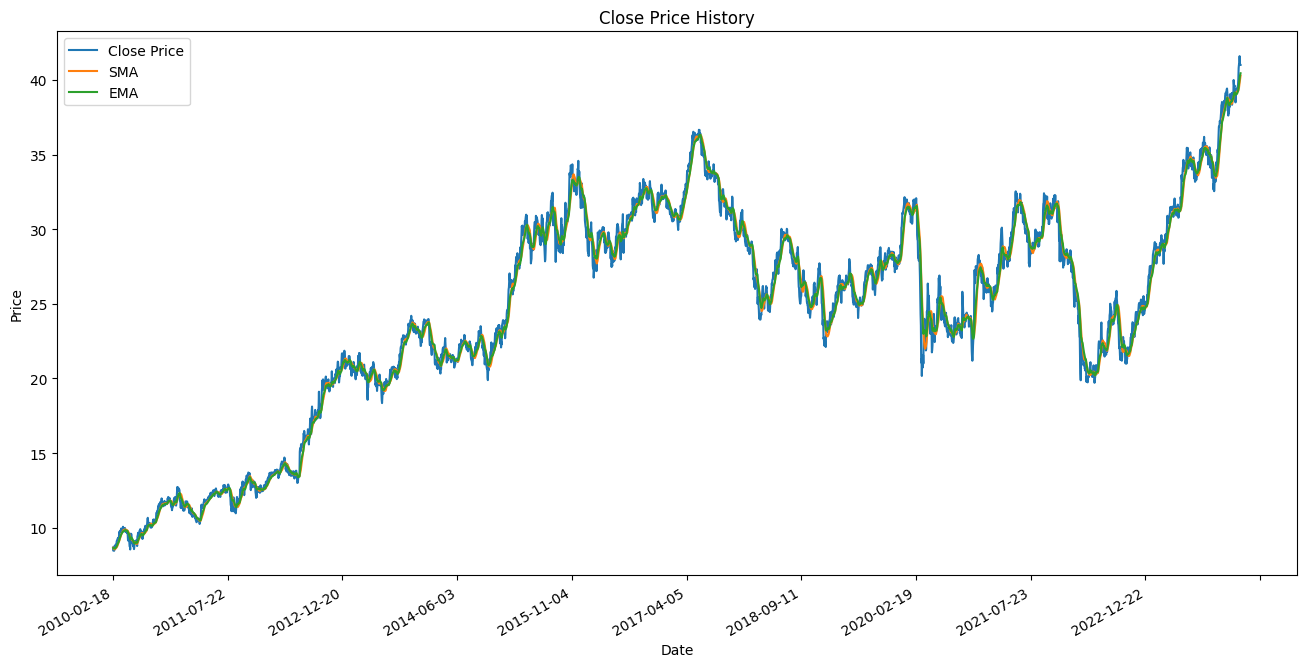

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_reciente = df[df['Date'] >= '2015-01-01']


# Vamos a representar la SMA y el precio de cierre
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA'], label='SMA')
plt.plot(df['Date'], df['EMA'], label='EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically set the tick positions
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

# Guardo el gráfico
# plt.savefig('Graficos/Close_price_COL.csv')

plt.show()

# 1. PCA + LSTM

## ARQUITECTURA 1

In [ ]:
def build_stacked_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=Adam(.01), loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_pca_train.shape[1], X_p_pca_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_lstm_model = build_stacked_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')
# Train the model
#
history_pb = stacked_lstm_model.fit(X_p_pca_train, y_p_pca_train, epochs=300, batch_size=32,
                    # validation_data=(X_p_pca_test, y_p_pca_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/300
84/84 [==============================] - 5s 15ms/step - loss: 0.0423 - val_loss: 5.9591e-04
Epoch 2/300
84/84 [==============================] - 1s 8ms/step - loss: 4.3714e-04 - val_loss: 5.5536e-04
Epoch 3/300
84/84 [==============================] - 1s 7ms/step - loss: 3.2469e-04 - val_loss: 4.8342e-04
Epoch 4/300
84/84 [==============================] - 1s 10ms/step - loss: 2.8974e-04 - val_loss: 3.8768e-04
Epoch 5/300
84/84 [==============================] - 1s 9ms/step - loss: 2.9770e-04 - val_loss: 7.8157e-04
Epoch 6/300
84/84 [==============================] - 1s 10ms/step - loss: 3.1950e-04 - val_loss: 3.8286e-04
Epoch 7/300
84/84 [==============================] - 1s 7ms/step - loss: 2.8391e-04 - val_loss: 3.2973e-04
Epoch 8/300
84/84 [==============================] - 1s 7ms/step - loss: 4.8346e-04 - val_loss: 0.0013
Epoch 9/300
84/84 [==============================] - 1s 7ms/step - loss: 3.7602e-04 - val_loss: 4.8916e-04
Epoch 10/300
84/84 [======================

In [ ]:
stacked_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 128)           69120     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 120179 (469.45 KB)
Trainable params: 120179 (469.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
stacked_pred = stacked_lstm_model.predict(X_p_pca_test)

7/7 [==============================] - 1s 3ms/step


In [ ]:
y_pca_pred_original = y_scaler.inverse_transform(stacked_pred)
y_pca_test_original = y_scaler.inverse_transform(y_p_pca_test)

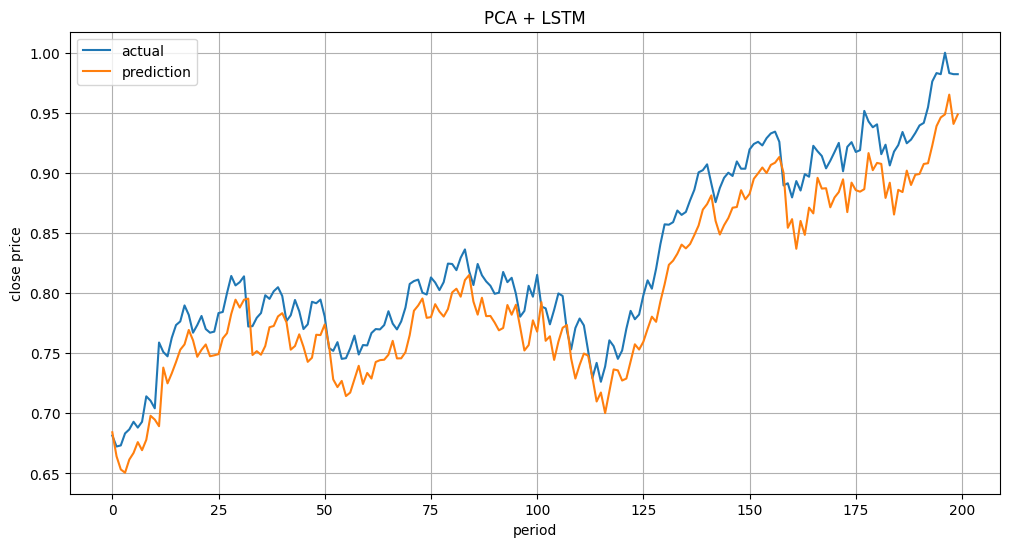

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('PCA + LSTM')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_pca_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

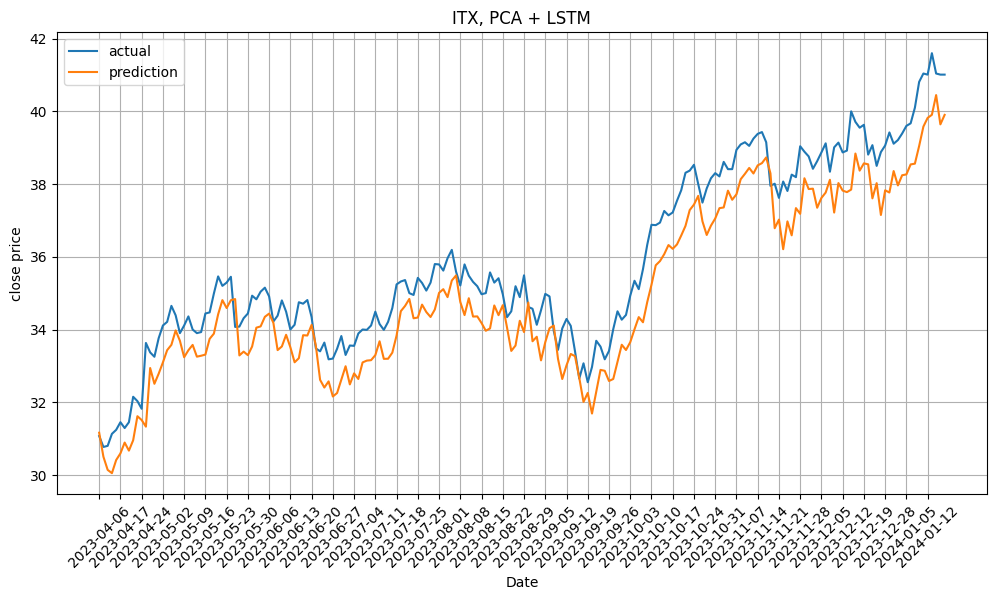

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, PCA + LSTM')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi,y_pca_test_original, label='actual')
plt.plot(date_values_bi,y_pca_pred_original, label='prediction')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.savefig(f'/content/Figures/{empresa}_PCA_LSTM.png')
plt.show()



In [ ]:
print('(Predicted)', '(Actual)', 'Diferencia')

for i in range(y_pca_test_original.size):
  print(y_pca_pred_original[i], y_pca_test_original[i], (y_pca_pred_original[i]-y_pca_test_original[i]))

(Predicted) (Actual) Diferencia
[31.161076] [31.06999969] [0.0910759]
[30.500021] [30.77000046] [-0.26997948]
[30.138992] [30.79999924] [-0.66100693]
[30.048779] [31.12999916] [-1.08122063]
[30.409954] [31.23999977] [-0.8300457]
[30.59247] [31.45000076] [-0.85753059]
[30.890331] [31.29000092] [-0.39966965]
[30.66878] [31.45000076] [-0.78122139]
[30.953867] [32.15000153] [-1.19613457]
[31.615183] [32.02999878] [-0.4148159]
[31.510275] [31.81999969] [-0.30972481]
[31.32791] [33.63000107] [-2.3020916]
[32.94008] [33.36999893] [-0.4299202]
[32.506836] [33.25] [-0.74316406]
[32.78291] [33.75999832] [-0.97708893]
[33.09439] [34.11000061] [-1.01560974]
[33.431618] [34.20999908] [-0.77838135]
[33.578014] [34.65000153] [-1.07198715]
[33.974567] [34.38999939] [-0.41543198]
[33.69024] [33.90000153] [-0.20976257]
[33.2373] [34.11000061] [-0.87269974]
[33.42959] [34.36000061] [-0.93041229]
[33.576344] [34.] [-0.42365646]
[33.253143] [33.90000153] [-0.64685822]
[33.2782] [33.93000031] [-0.65180206]


In [ ]:
# Calculate error metrics
pca_lstm_rmse = np.sqrt(mean_squared_error(y_pca_test_original, y_pca_pred_original))
pca_lstm_mae = mean_absolute_error(y_pca_test_original, y_pca_pred_original)
pca_lstm_mape = mean_absolute_percentage_error(y_pca_test_original, y_pca_pred_original)
pca_lstm_r2 = r2_score(y_pca_test_original, y_pca_pred_original)

# Print each value
print("RMSE of PCA + LSTM :", pca_lstm_rmse)
print("MAE of PCA + LSTM :", pca_lstm_mae)
print("MAPE of PCA + LSTM :", pca_lstm_mape)
print("R2 of PCA + LSTM :", pca_lstm_r2)

# RMSE of PCA + LSTM : 0.5058650608243672
# MAE of PCA + LSTM : 0.32675691604614265
# MAPE of PCA + LSTM : 0.009687210983692145
# R2 of PCA + LSTM : 0.9743242276512218

RMSE of PCA + LSTM : 1.0241850734859257
MAE of PCA + LSTM : 0.9294200611114499
MAPE of PCA + LSTM : 0.025749449234963792
R2 of PCA + LSTM : 0.8281450684941352


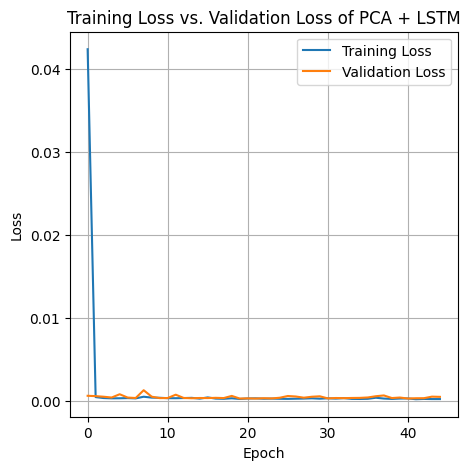

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of PCA + LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

## Arquitectura 1 con Keras Tuner

In [ ]:
def build_stacked_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
def build_pca_lstm_model_2_keras_tuner(input_shape, learning_rate):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

In [ ]:
def build_model(hp):
    input_shape = (X_p_pca_train.shape[1], X_p_pca_train.shape[2])  # Assuming X_p_train has the correct shape
    # units = hp.Int('units', min_value=32, max_value=512, step=32)
    # activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    # dropout = hp.Float('dropout', min_value=0.1, max_value=0.2, step=0.1)
    # learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    learning_rate = hp.Choice('learning_rate', values=[.0001, .0005, .001, .005, .01])
    # call existing model-building code with the hyperparameter values.
    model = build_pca_lstm_model_2_keras_tuner(
        input_shape=input_shape, learning_rate=learning_rate
    )
    return model


In [ ]:
build_model(kt.HyperParameters())

NameError: name 'kt' is not defined

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective = 'val_loss',
    # objective = 'root_mean_square_error',
    seed = 232,
    max_trials = 50,
    executions_per_trial = 3,
    directory = 'random_search',
    project_name = 'example_3')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.005, 0.01], 'ordered': True}


In [ ]:
tuner.search(X_p_pca_train, y_p_pca_train, epochs=50, batch_size=32, validation_split=.2,)

Trial 5 Complete [00h 03m 52s]
val_loss: 0.00023711172010128698

Best val_loss So Far: 0.00021032043635689965
Total elapsed time: 00h 18m 01s


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           69120     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 120179 (469.45 KB)
Trainable params: 120179 (469.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tuner.results_summary()

Results summary
Results in random_search/example_3
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.00021032043635689965

Trial 01 summary
Hyperparameters:
learning_rate: 0.005
Score: 0.0002203089485798652

Trial 04 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.00023711172010128698

Trial 00 summary
Hyperparameters:
learning_rate: 0.0005
Score: 0.00026334140663190436

Trial 02 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.00039926523459143937


# 2. LSTM

## Creo arquitectura

In [ ]:
def build_stacked_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_train.shape[1], X_p_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_lstm_model = build_stacked_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min')
# Train the model
#
history_pb = stacked_lstm_model.fit(X_p_train, y_p_train, epochs=300, batch_size=32,
                    # validation_data=(X_p_test, y_p_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/300
84/84 [==============================] - 4s 16ms/step - loss: 0.0144 - val_loss: 0.0011
Epoch 2/300
84/84 [==============================] - 1s 8ms/step - loss: 5.1780e-04 - val_loss: 6.4022e-04
Epoch 3/300
84/84 [==============================] - 1s 7ms/step - loss: 4.1554e-04 - val_loss: 5.5801e-04
Epoch 4/300
84/84 [==============================] - 1s 7ms/step - loss: 3.5311e-04 - val_loss: 5.4415e-04
Epoch 5/300
84/84 [==============================] - 1s 8ms/step - loss: 3.6228e-04 - val_loss: 5.3731e-04
Epoch 6/300
84/84 [==============================] - 1s 8ms/step - loss: 3.6401e-04 - val_loss: 5.1832e-04
Epoch 7/300
84/84 [==============================] - 1s 9ms/step - loss: 3.2938e-04 - val_loss: 4.5553e-04
Epoch 8/300
84/84 [==============================] - 1s 9ms/step - loss: 2.9667e-04 - val_loss: 4.3090e-04
Epoch 9/300
84/84 [==============================] - 1s 11ms/step - loss: 3.3052e-04 - val_loss: 4.6074e-04
Epoch 10/300
84/84 [=======================

In [ ]:
stacked_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           74240     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125299 (489.45 KB)
Trainable params: 125299 (489.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
stacked_pred = stacked_lstm_model.predict(X_p_test)

7/7 [==============================] - 1s 3ms/step


In [ ]:
y_pred_original = y_scaler.inverse_transform(stacked_pred)
y_test_original = y_scaler.inverse_transform(y_p_test)
y_train_original = y_scaler.inverse_transform(y_p_train)

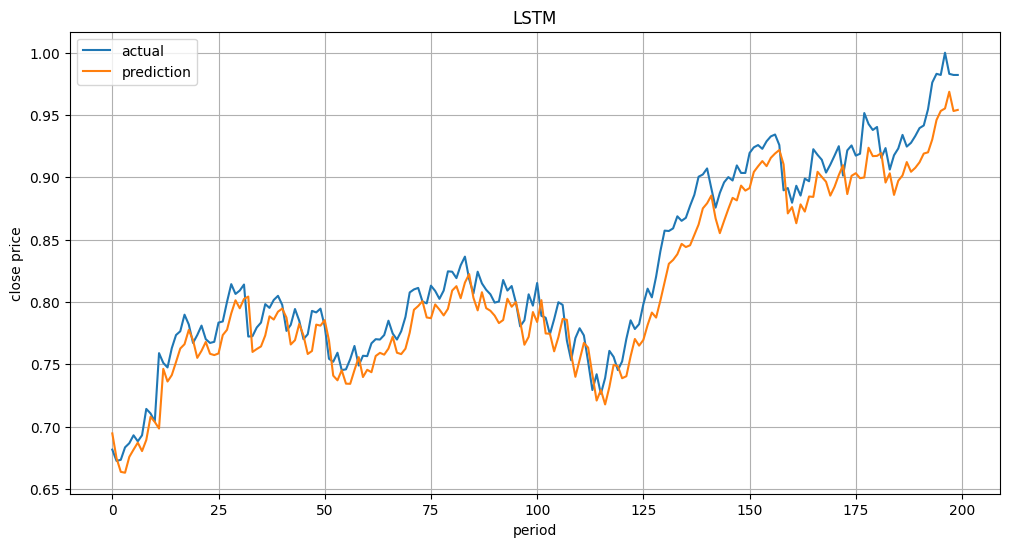

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('LSTM')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_test, label='actual')
plt.plot(stacked_pred, label='prediction')
# plt.plot(y_p_train, label='train')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

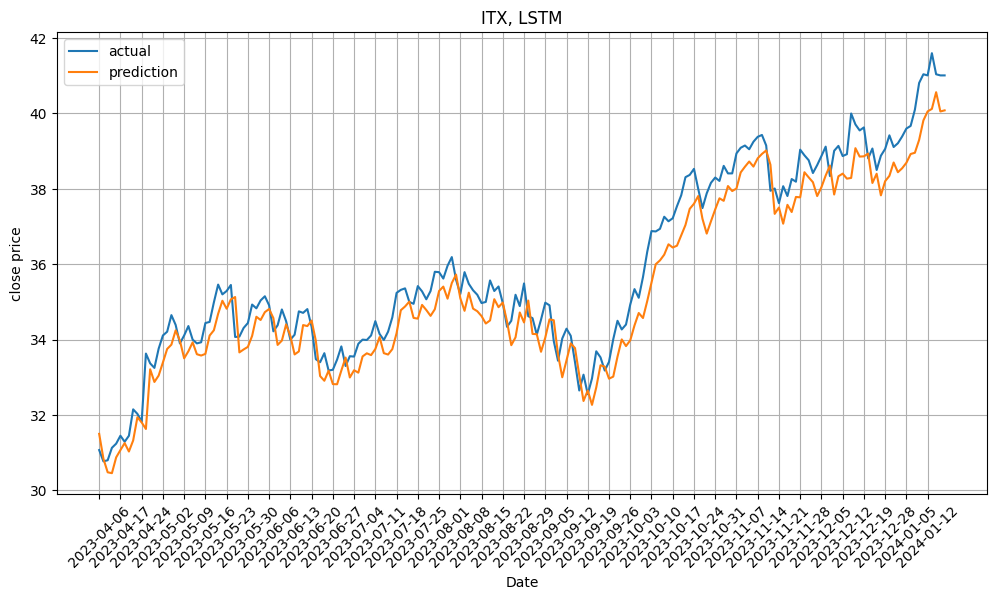

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
date_values_pre = df['Date'].iloc[train_index][100:].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, LSTM')
plt.ylabel('close price')
plt.xlabel('Date')
# plt.plot(date_values_bi,y_test_original, label='actual')
# plt.plot(date_values_bi,y_pred_original, label='prediction')
plt.plot(date_values_bi, y_test_original, label='actual')
plt.plot(date_values_bi, y_pred_original, label='prediction')
# plt.plot(date_values_pre, y_train_original, label='train')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.savefig(f'/content/Figures/{empresa}_LSTM.png')

plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
# Calculate error metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
lstm_mae = mean_absolute_error(y_test_original, y_pred_original)
lstm_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
lstm_r2 = r2_score(y_test_original, y_pred_original)

# Print each value
print("RMSE of LSTM :", lstm_rmse) # 0.5802479964959857
print("MAE of LSTM :", lstm_mae) # 0.41025037765502925
print("MAPE of LSTM :", lstm_mape) # 0.012316178166798636
print("R2 of LSTM :", lstm_r2) # 0.9662183042235228

# RMSE of LSTM : 0.45577281062478614
# MAE of LSTM : 0.28663881301879884
# MAPE of LSTM : 0.008492286201552296
# R2 of LSTM : 0.9791574441237528

RMSE of LSTM : 0.6981565568462034
MAE of LSTM : 0.5980963420867919
MAPE of LSTM : 0.016489539995725267
R2 of LSTM : 0.9201434107631108


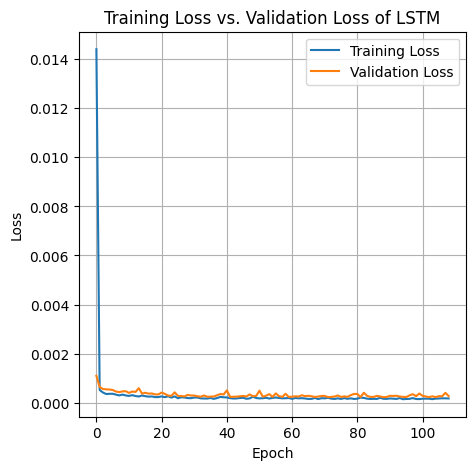

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

# 3. GRU

## Arquitectura 1

In [ ]:
def build_stacked_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(100, return_sequences=True, input_shape=input_shape, activation='tanh'))
    model.add(Dropout(0.3))

    # Second GRU layer
    model.add(GRU(80, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))

    # Third GRU layer
    model.add(GRU(50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.1))

    # Fourth GRU layer
    model.add(GRU(30, activation='tanh'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_train.shape[1], X_p_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_gru_model = build_stacked_gru_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')
# Train the model
#
history_pb = stacked_gru_model.fit(X_p_train, y_p_train, epochs=300, batch_size=32,  #batch_size=150
                    # validation_data=(X_p_test, y_p_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/300
84/84 [==============================] - 10s 25ms/step - loss: 0.0183 - val_loss: 0.0016
Epoch 2/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 3/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 4/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 5/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 6/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 7/300
84/84 [==============================] - 1s 14ms/step - loss: 0.0033 - val_loss: 7.9422e-04
Epoch 8/300
84/84 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 9/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0029 - val_loss: 6.7747e-04
Epoch 10/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0029 - val_los

In [ ]:
stacked_gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           35400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 30, 80)            43680     
                                                                 
 dropout_1 (Dropout)         (None, 30, 80)            0         
                                                                 
 gru_2 (GRU)                 (None, 30, 50)            19800     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 30)               

In [ ]:
stacked_pred = stacked_gru_model.predict(X_p_test)

7/7 [==============================] - 1s 5ms/step


In [ ]:
y_pred_original = y_scaler.inverse_transform(stacked_pred)
y_test_original = y_scaler.inverse_transform(y_p_test)

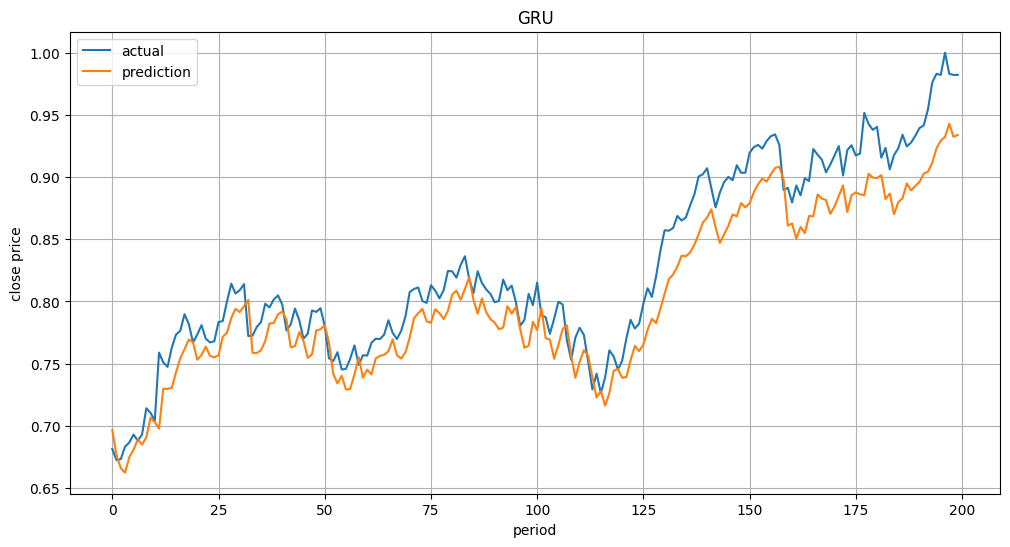

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('GRU')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

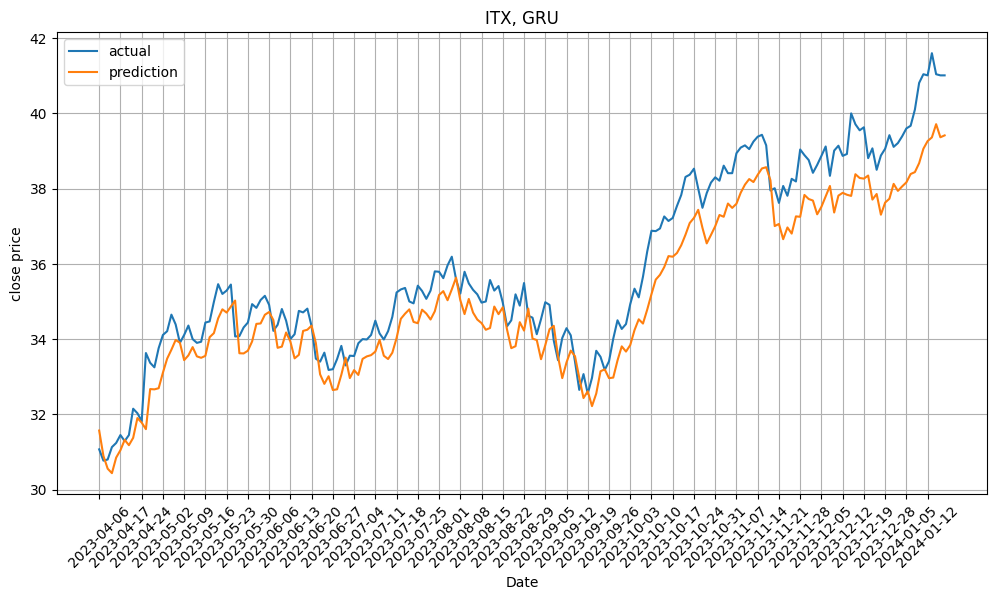

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, GRU')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi,y_test_original, label='actual')
plt.plot(date_values_bi,y_pred_original, label='prediction')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.savefig(f'/content/Figures/{empresa}_GRU.png')

plt.show()

In [ ]:
# Calculate error metrics
gru_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
gru_mae = mean_absolute_error(y_test_original, y_pred_original)
gru_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
gru_r2 = r2_score(y_test_original, y_pred_original)

# Print each value
print("RMSE of GRU :", gru_rmse) #
print("MAE of GRU :", gru_mae) #
print("MAPE of GRU :", gru_mape) #
print("R2 of GRU :", gru_r2) #

# RMSE of GRU : 0.7312308183964071
# MAE of GRU : 0.5690920066833498
# MAPE of GRU : 0.016752150049823514
# R2 of GRU : 0.946350815961559

RMSE of GRU : 0.9547388267449316
MAE of GRU : 0.8254246425628662
MAPE of GRU : 0.022511888334350087
R2 of GRU : 0.8506606406494739


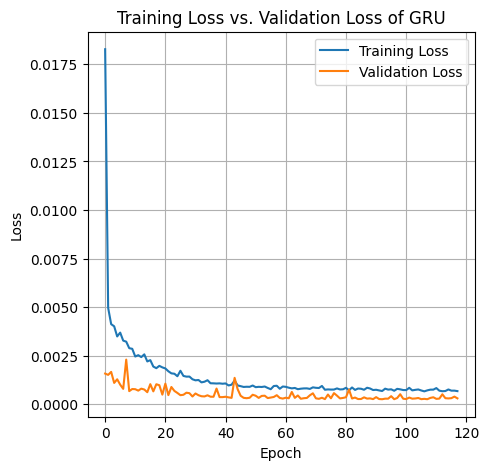

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

# 4. PCA + GRU

## Arquitectura 1

In [ ]:
def build_stacked_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(100, return_sequences=True, input_shape=input_shape, activation='tanh'))
    model.add(Dropout(0.3))

    # Second GRU layer
    model.add(GRU(80, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))

    # Third GRU layer
    model.add(GRU(50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.1))

    # Fourth GRU layer
    model.add(GRU(30, activation='tanh'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_pca_train.shape[1], X_p_pca_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_gru_model = build_stacked_gru_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')
# Train the model
#
history_pb = stacked_gru_model.fit(X_p_pca_train, y_p_pca_train, epochs=300, batch_size=32,  #batch_size=150
                    # validation_data=(X_p_pca_test, y_p_pca_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/300
84/84 [==============================] - 8s 29ms/step - loss: 0.0153 - val_loss: 6.1746e-04
Epoch 2/300
84/84 [==============================] - 1s 13ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 3/300
84/84 [==============================] - 1s 13ms/step - loss: 0.0042 - val_loss: 5.9902e-04
Epoch 4/300
84/84 [==============================] - 1s 13ms/step - loss: 0.0032 - val_loss: 5.7894e-04
Epoch 5/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0031 - val_loss: 5.9914e-04
Epoch 6/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0030 - val_loss: 5.2983e-04
Epoch 7/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 8/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 5.9915e-04
Epoch 9/300
84/84 [==============================] - 1s 11ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 10/300
84/84 [==============================] - 1s 11ms/step - loss: 0

In [ ]:
stacked_gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 100)           32400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 100)           0         
                                                                 
 gru_5 (GRU)                 (None, 30, 80)            43680     
                                                                 
 dropout_5 (Dropout)         (None, 30, 80)            0         
                                                                 
 gru_6 (GRU)                 (None, 30, 50)            19800     
                                                                 
 dropout_6 (Dropout)         (None, 30, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 30)               

In [ ]:
stacked_pred = stacked_gru_model.predict(X_p_pca_test)

7/7 [==============================] - 1s 5ms/step


In [ ]:
y_pca_pred_original = y_scaler.inverse_transform(stacked_pred)
y_pca_test_original = y_scaler.inverse_transform(y_p_pca_test)

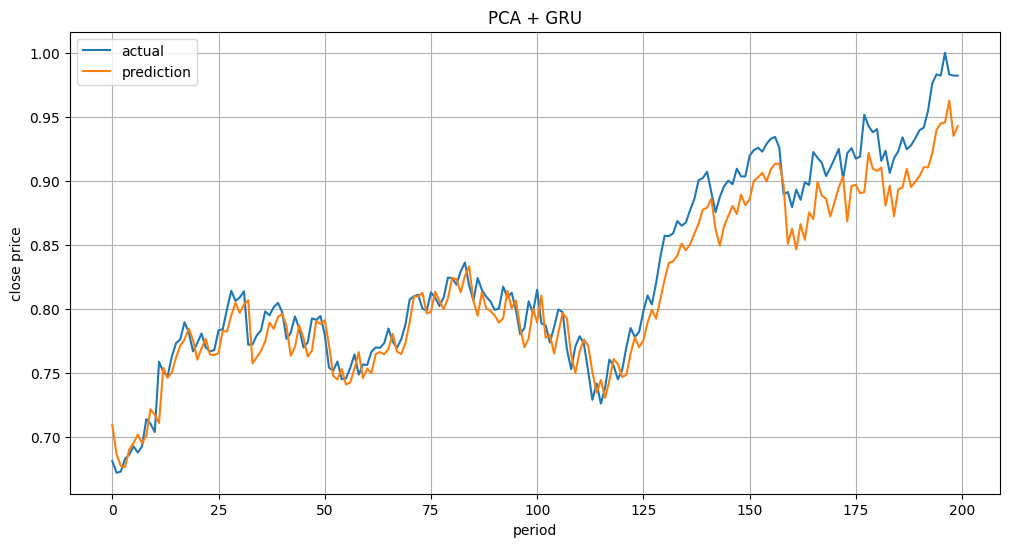

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('PCA + GRU')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_pca_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

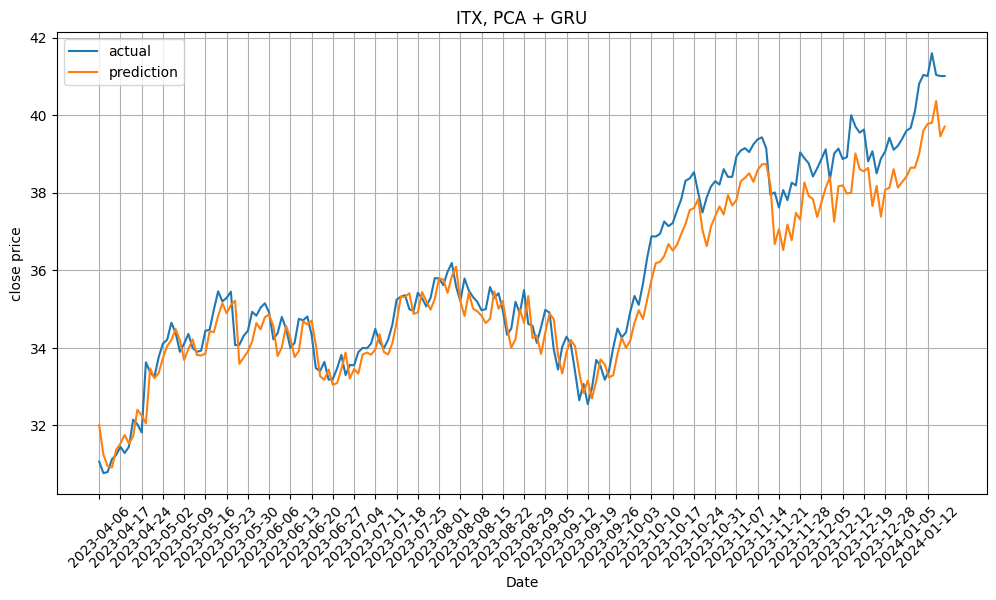

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, PCA + GRU')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi,y_pca_test_original, label='actual')
plt.plot(date_values_bi,y_pca_pred_original, label='prediction')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.savefig(f'/content/Figures/{empresa}_PCA_GRU.png')

plt.show()

In [ ]:
# Calculate error metrics
pca_gru_rmse = np.sqrt(mean_squared_error(y_pca_test_original, y_pca_pred_original))
pca_gru_mae = mean_absolute_error(y_pca_test_original, y_pca_pred_original)
pca_gru_mape = mean_absolute_percentage_error(y_pca_test_original, y_pca_pred_original)
pca_gru_r2 = r2_score(y_pca_test_original, y_pca_pred_original)

# Print each value
print("RMSE of PCA + GRU :", pca_gru_rmse) #
print("MAE of PCA + GRU :", pca_gru_mae) #
print("MAPE of PCA + GRU :", pca_gru_mape) #
print("R2 of PCA + GRU :", pca_gru_r2) #

# RMSE of PCA + GRU : 0.47933489249206584
# MAE of PCA + GRU : 0.318874683380127
# MAPE of PCA + GRU : 0.009468001054518206
# R2 of PCA + GRU : 0.9769467460003118

RMSE of PCA + GRU : 0.7265100569578573
MAE of PCA + GRU : 0.5852608776092529
MAPE of PCA + GRU : 0.015896489915737725
R2 of PCA + GRU : 0.9135254370156437


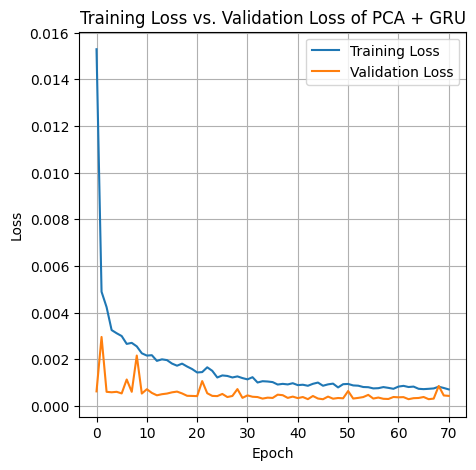

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of PCA + GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

# 5. AE + LSTM

## Arquitectura 2

In [ ]:
def build_stacked_ae_lstm_model_2(input_shape):
    model = Sequential()

    # Encoder
    model.add(LSTM(input_shape[0], activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(6, activation='relu', return_sequences=True))
    model.add(LSTM(1, activation='relu'))
    model.add(RepeatVector(input_shape[0]))

    # Decoder
    model.add(LSTM(1, activation='linear', return_sequences=True))
    model.add(LSTM(6, activation='linear', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))

    # Arquitectura LSTM
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=.0001), loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_train.shape[1], X_p_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_ae_lstm_model = build_stacked_ae_lstm_model_2(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
# Train the model
#
history_pb = stacked_ae_lstm_model.fit(X_p_train, y_p_train, epochs=300, batch_size=128,
                    # validation_data=(X_p_test, y_p_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/300
21/21 [==============================] - 13s 183ms/step - loss: 0.2135 - val_loss: 0.2074
Epoch 2/300
21/21 [==============================] - 3s 123ms/step - loss: 0.0910 - val_loss: 0.0084
Epoch 3/300
21/21 [==============================] - 3s 159ms/step - loss: 0.0345 - val_loss: 0.0110
Epoch 4/300
21/21 [==============================] - 3s 124ms/step - loss: 0.0157 - val_loss: 0.0044
Epoch 5/300
21/21 [==============================] - 3s 124ms/step - loss: 0.0063 - val_loss: 0.0035
Epoch 6/300
21/21 [==============================] - 3s 133ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 7/300
21/21 [==============================] - 3s 160ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/300
21/21 [==============================] - 3s 125ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/300
21/21 [==============================] - 3s 121ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/300
21/21 [==============================] - 3s 122ms/step - loss: 0.0013 - val_l

In [ ]:
stacked_ae_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 30)            5640      
                                                                 
 lstm_7 (LSTM)               (None, 30, 6)             888       
                                                                 
 lstm_8 (LSTM)               (None, 1)                 32        
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 1)             0         
 r)                                                              
                                                                 
 lstm_9 (LSTM)               (None, 30, 1)             12        
                                                                 
 lstm_10 (LSTM)              (None, 30, 6)             192       
                                                      

In [ ]:
stacked_pred = stacked_ae_lstm_model.predict(X_p_test)

7/7 [==============================] - 1s 29ms/step


In [ ]:
y_pred_original = y_scaler.inverse_transform(stacked_pred)
y_test_original = y_scaler.inverse_transform(y_p_test)

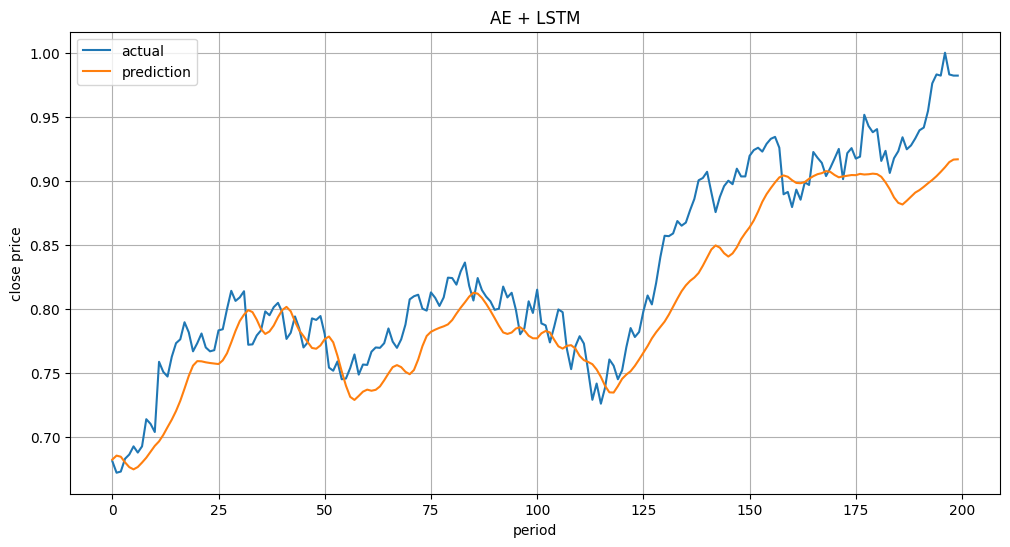

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('AE + LSTM')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

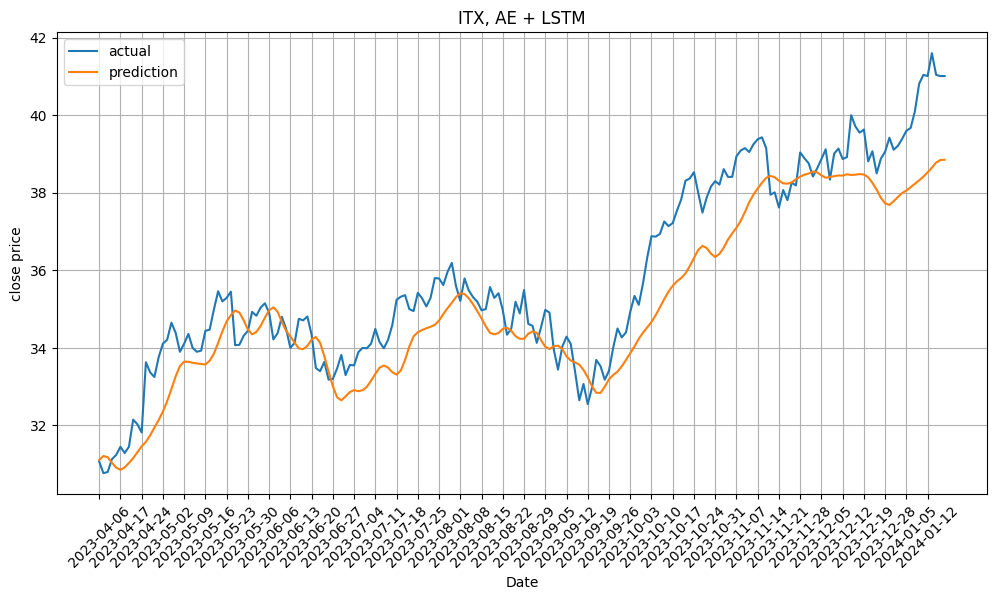

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, AE + LSTM')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi,y_test_original, label='actual')
plt.plot(date_values_bi,y_pred_original, label='prediction')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.savefig(f'/content/Figures/{empresa}_AE_LSTM.png')
plt.show()

In [ ]:
# Calculate error metrics
ae_lstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
ae_lstm_mae = mean_absolute_error(y_test_original, y_pred_original)
ae_lstm_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
ae_lstm_r2 = r2_score(y_test_original, y_pred_original)

# Print each value
print("RMSE of AE + LSTM :", ae_lstm_rmse) # 0.959656031054751
print("MAE of AE + LSTM :", ae_lstm_mae) # 0.7111100959777835
print("MAPE of AE + LSTM :", ae_lstm_mape) # 0.02090141064843619
print("R2 of AE + LSTM :", ae_lstm_r2) # 0.9075971553313635

# RMSE of AE + LSTM : 0.8310676481442387
# MAE of AE + LSTM : 0.60450234413147
# MAPE of AE + LSTM : 0.017885439168593694
# R2 of AE + LSTM : 0.9307010107751745

RMSE of AE + LSTM : 1.117316411341775
MAE of AE + LSTM : 0.9131982994079588
MAPE of AE + LSTM : 0.024981619518254082
R2 of AE + LSTM : 0.7954697870936565


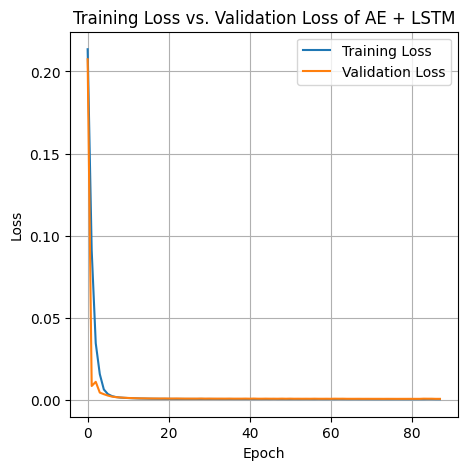

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of AE + LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

# 6. AE + GRU

## Arquitectura 1

In [ ]:
def build_stacked_ae_gru_model(input_shape):
    model = Sequential()

    # Encoder
    model.add(GRU(32, activation='tanh', input_shape=input_shape, return_sequences=True))
    model.add(GRU(4, activation='tanh', return_sequences=False, dropout = 0.2))
    model.add(RepeatVector(input_shape[0]))

    # Decoder
    model.add(GRU(4, activation='tanh', return_sequences=True))
    model.add(GRU(32, activation='tanh', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))

    # Arquitectura GRU
    model.add(GRU(100, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.3))

    # Second GRU layer
    model.add(GRU(80, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))

    # Third GRU layer
    model.add(GRU(50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.1))

    # Fourth GRU layer
    model.add(GRU(30, activation='tanh'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_train.shape[1], X_p_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_ae_gru_model = build_stacked_ae_gru_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
# Train the model
#
history_pb = stacked_ae_gru_model.fit(X_p_train, y_p_train, epochs=100, batch_size=64,
                    # validation_data=(X_p_test, y_p_test),
                    validation_split=.2, callbacks=[early_stopping])

Epoch 1/100
42/42 [==============================] - 13s 87ms/step - loss: 0.0722 - val_loss: 0.0120
Epoch 2/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0304 - val_loss: 0.0078
Epoch 3/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0080 - val_loss: 0.0043
Epoch 4/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 5/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 6/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 7/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 8/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 9/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 10/100
42/42 [==============================] - 1s 19ms/step - loss: 0.0032 - val_loss: 0.001

In [ ]:
stacked_ae_gru_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 30, 32)            4800      
                                                                 
 gru_9 (GRU)                 (None, 4)                 456       
                                                                 
 repeat_vector_1 (RepeatVec  (None, 30, 4)             0         
 tor)                                                            
                                                                 
 gru_10 (GRU)                (None, 30, 4)             120       
                                                                 
 gru_11 (GRU)                (None, 30, 32)            3648      
                                                                 
 time_distributed_1 (TimeDi  (None, 30, 16)            528       
 stributed)                                           

In [ ]:
stacked_pred = stacked_ae_gru_model.predict(X_p_test)

7/7 [==============================] - 2s 7ms/step


In [ ]:
y_pred_original = y_scaler.inverse_transform(stacked_pred)
y_test_original = y_scaler.inverse_transform(y_p_test)

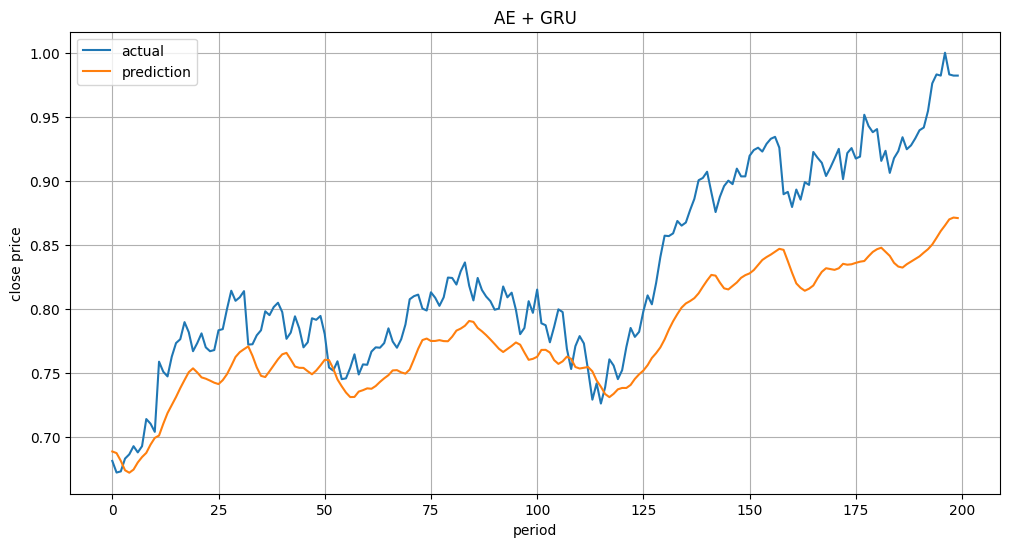

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('AE + GRU')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

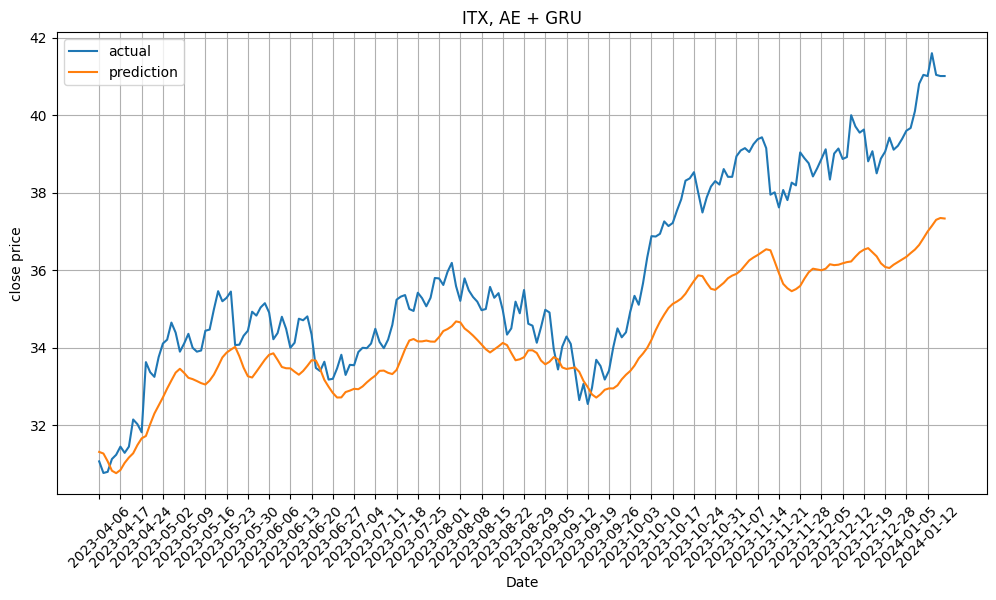

In [ ]:
#Real values of prediction
date_values_bi = df['Date'].iloc[test_index].values
selected_dates = date_values_bi[::5]

plt.figure(figsize=(12, 6))
plt.title(f'{empresa}, AE + GRU')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi,y_test_original, label='actual')
plt.plot(date_values_bi,y_pred_original, label='prediction')
plt.xticks(selected_dates, rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.savefig(f'/content/Figures/{empresa}_AE_GRU.png')
plt.show()

In [ ]:
# Calculate error metrics
ae_gru_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
ae_gru_mae = mean_absolute_error(y_test_original, y_pred_original)
ae_gru_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
ae_gru_r2 = r2_score(y_test_original, y_pred_original)

# Print each value
print("RMSE of AE + GRU :", ae_gru_rmse)
print("MAE of AE + GRU :", ae_gru_mae)
print("MAPE of AE + GRU :", ae_gru_mape)
print("R2 of AE + GRU :", ae_gru_r2)

# RMSE of AE + GRU : 0.7272545243239197
# MAE of AE + GRU : 0.5461990928649904
# MAPE of AE + GRU : 0.01597572197580904
# R2 of AE + GRU : 0.9469326976791641

RMSE of AE + GRU : 1.9182156080597519
MAE of AE + GRU : 1.6124019718170166
MAPE of AE + GRU : 0.04336378973645443
R2 of AE + GRU : 0.39716292262848163


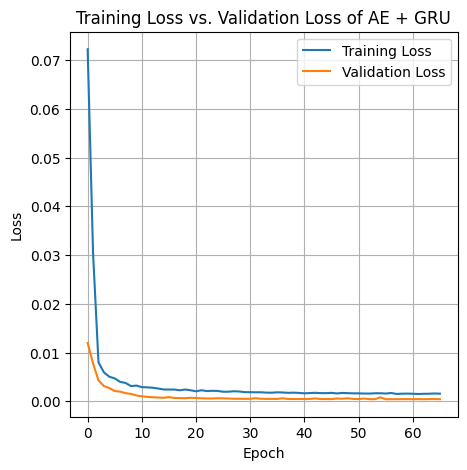

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of AE + GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.show()

# Resumen modelos

In [ ]:
# Create a dictionary with the results
results = {
    'Model': ['LSTM', 'PCA+LSTM', 'GRU', 'PCA+GRU', 'AE+LSTM', 'AE+GRU'],
    'RMSE': [lstm_rmse, pca_lstm_rmse, gru_rmse, pca_gru_rmse, ae_lstm_rmse, ae_gru_rmse],
    'MAE': [lstm_mae, pca_lstm_mae, gru_mae, pca_gru_mae, ae_lstm_mae, ae_gru_mae],
    'MAPE': [lstm_mape, pca_lstm_mape, gru_mape, pca_gru_mape, ae_lstm_mape, ae_gru_mape],
    'R2': [lstm_r2, pca_lstm_r2, gru_r2, pca_gru_r2, ae_lstm_r2, ae_gru_r2]
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results



,Model,RMSE,MAE,MAPE,R2
0,LSTM,0.698157,0.598096,0.016490,0.920143
1,PCA+LSTM,1.024185,0.929420,0.025749,0.828145
2,GRU,0.954739,0.825425,0.022512,0.850661
3,PCA+GRU,0.726510,0.585261,0.015896,0.913525
4,AE+LSTM,1.117316,0.913198,0.024982,0.795470
5,AE+GRU,1.918216,1.612402,0.043364,0.397163


In [ ]:
df_results.to_csv(f'results/results_{empresa}.csv', index=False)

Como se puede observar, el modelo que mejor resultados obtiene es el de la arquitectura híbrida de PCA+LSTM, aunque seguido de cerca por la arquitectura de LSTM normal.

# Aplicación de la mejor arquitectura sobre todas las empresas